# Homework 6 - Women and children first?!

The objective of this homework is to practice simple decision trees. To successfully complete this homework, you may use any resources available to you. 

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column that specifies whether the person is a child (age <= 10)
    * Group the data by `sex`, `child`, `pclass` and interpret the survival rate.
2. Develop a decision tree with depth of 1.
    * Preprocess the `sex` column using LabelEncoder
    * Develop the decision tree
    * Visually reproduce the decision tree using a seaborn barchart.
    * Use the t-test from scipy.stats to statistically reproduce the decision.
    * Interpret the decision tree.
3. Develop a decision tree with depth of 2.
    * Develop the decision tree
    * Visually reproduce the decision tree using seaborn barcharts (left side and right side)
    * Use the ranksums test from scipy.stats to statistically reproduce the decisions.
    * Interpret the decision tree. 
    
Hints:
* Explain what you are doing.
* Use references.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
%matplotlib inline

In [6]:
tc = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [7]:
tc.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

## Women and children first?

### Create a column that specifies whether the person is a child (10 years or younger)


In [9]:
tc1 = tc.copy()

In [10]:
tc1['Child'] = np.where(tc1['age']>=10, 0, 1)

Here, to Analyse the data better, a new column 'Child' is created and a binary classification is done based on the age of the person, if the person is older than 10, then a value '0' is set showing the person is not a child. If the person is younger than 10, a value of '1' is set. 

Reference : https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

### Group the data by `sex`, `child`, `pclass` and interpret the survival rate.

In [33]:
tc1.groupby(['sex','Child','pclass'])['survived'].agg(['mean','sum','count'])

mean    sum  count
sex    Child pclass                        
female 0     1.0     0.969697  128.0    132
             2.0     0.880435   81.0     92
             3.0     0.464000   58.0    125
       1     1.0     0.916667   11.0     12
             2.0     0.928571   13.0     14
             3.0     0.527473   48.0     91
male   0     1.0     0.337838   50.0    148
             2.0     0.081633   12.0    147
             3.0     0.150000   48.0    320
       1     1.0     0.354839   11.0     31
             2.0     0.541667   13.0     24
             3.0     0.156069   27.0    173

In [128]:
sampleDF = tc1.copy()

In [129]:
sampleDF = sampleDF.groupby(['sex','Child','pclass'])['survived'].agg(['mean','sum','count'])

Now, a person is grouped by their 'sex', if he/she is a 'child' and by the class of travel in the 'Titanic'. The agg function is used to determine the total number of people in each grouped category and a

In [19]:
sampleDF['Ratio of Survival'] = sampleDF['sum']/sampleDF['count']

In [23]:
sampleDF['Standardized Ratio'] = sampleDF['Ratio of Survival'].mean() - sampleDF['Ratio of Survival']

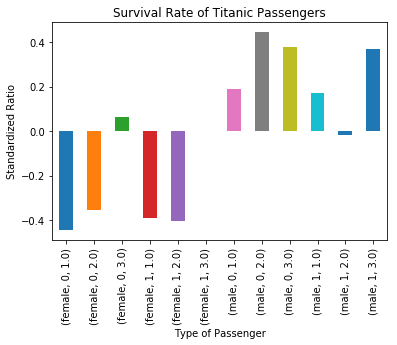

In [32]:
import matplotlib.pyplot as plt
sampleDF['Standardized Ratio'].plot.bar()
plt.xlabel('Type of Passenger');
plt.ylabel('Standardized Ratio');
plt.title('Survival Rate of Titanic Passengers');

The standardized survival ratio of the passengers is very important aspect of the Analysis of the Data. The general perception is that Women and Children(irrespective of their Sex) are given first preference during a crisis. This is majorly due to the fact that men are believed to have higher physical strength and resistance during a crisis.

But from the Analysis, we can see clearly that Children who are male were not so lucky when trying to survive the 'Titanic' drowning. It can be seen from the above figure that the number of male children who survived the incident is too low when compared to their female counter parts. The only execptions being a male child in the second class had a better survival rate and a female child in the third class on the 'Titanic'.

This might have been due to there being more male children who were very young and couldn't be carried during the ship wreck.

## Decision Tree with depth of 1

### Restrict your analysis on the relevant columns (check table above).

In [447]:
survival = tc.copy()

In [449]:
X = survival.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'], axis=1)

### Preprocess the `sex` column

In [450]:
le = pp.LabelEncoder()
X['sex'] = le.fit_transform(X['sex'].astype(str))

In [451]:
X.dropna(inplace=True)

In [452]:
y = X['survived']

In [454]:
X = X.drop(['survived'],axis=1)

In [455]:
import sklearn.model_selection as ms
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,random_state=1)

In [456]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1).fit(X_train,y_train)

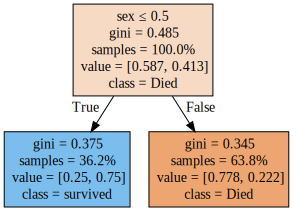

In [457]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns), 
                         class_names = ['survived' if i == 1 else 'Died' for i in dtc.classes_] ,
                         filled=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph  

/Users/agasthya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


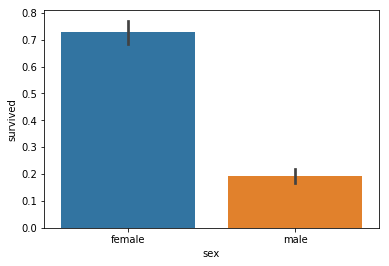

In [525]:
sns.barplot(x='sex',y='survived',data=survival);

### Use the t-test from `scipy.stats` to statistically reproduce the decision.

In [272]:
from scipy.stats import ttest_ind

In [539]:
t, p = ttest_ind(survival[survival['sex'] == 'female']['survived'], y, equal_var=False)

In [540]:
t,p

(12.449895070851383, 3.9185778365145616e-33)

In [542]:
t1, p1 = ttest_ind(survival[survival['sex'] == 'male']['survived'], y, equal_var=False)

In [543]:
t1,p1

(-10.667909648973822, 7.7101586863608186e-26)

Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

## Develop a decision tree with depth of 2

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [463]:
dtc2 = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

You need to adapt the `XXX` in the following code to visualize the decision tree.

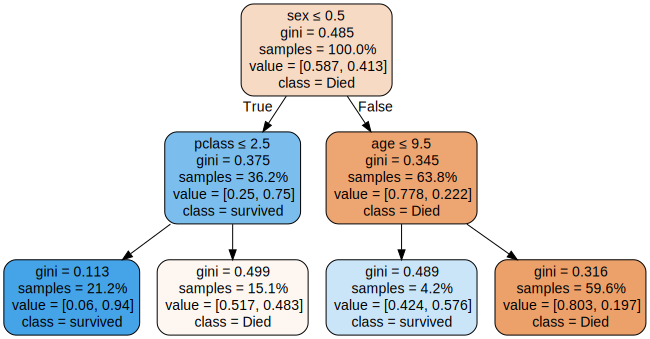

In [464]:
import graphviz
dot_data_2 = sk.tree.export_graphviz(dtc2, out_file=None, 
                         feature_names=list(X.columns), 
                         class_names = ['survived' if i == 1 else 'Died' for i in dtc2.classes_],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data_2)  
graph  

The Decision Tree initially classifies the data based on the gender of the passenger, this is because, on overall female passengers had better chance of survival than their male counter-parts and so, it chooses the condition of consideration to be the 'Gender' here. If the passenger is a 'female', then the new condition to be checked is the class of travel of the passenger and then the decision Tree determines if the passenger has survived the accident or not.

If the passenger is a male, then the condition of survival now is based on the age of the passenger. Here, the decision tree puts a condition based on age, that male passengers younger than 9.5 years of age have a better chance of survival.

###  Visually reproduce the left side of the decision tree using seaborn barcharts

In [507]:
bplot_df = survival[(survival['sex'] == 'female')].groupby(['survived','pclass']).agg('count')

/Users/agasthya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


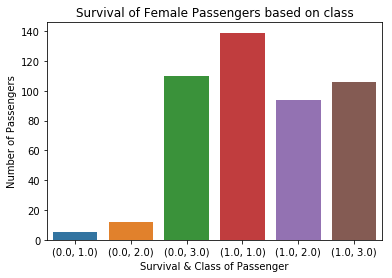

In [508]:
sns.barplot(x=bplot_df.index,y=bplot_df['sex'],data=bplot_df);
plt.xlabel('Survival & Class of Passenger');
plt.ylabel('Number of Passengers');
plt.title('Survival of Female Passengers based on class');

A barplot is used to reproduce the Decision tree, As it can be seen based on the plot, many passengers from 3rd class of the Titanic had lost their life and the survival numbers of the passengers in the first class is higher than the rest of the classes. Female passengers from the 1st and 2nd classes were at a better chance of survival than the female passengers of the 3rd class.

In [520]:
bplot_df2 = tc1[tc1['sex'] == 'male'].groupby(['Child','survived']).agg('count')

/Users/agasthya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


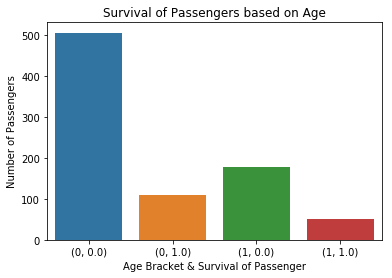

In [523]:
sns.barplot(x=bplot_df2.index,y=bplot_df2['sex'],data=bplot_df2);
plt.xlabel('Age Bracket & Survival of Passenger');
plt.ylabel('Number of Passengers');
plt.title('Survival of Passengers based on Age');

For the part of Data Analysis above, a new column was already created to determine if the passenger is a child or not based on the condition that the passenger is younger than 10 years.

Here , the value 1 determines that the passenger is a 'Child' and 0 determines that the passenger is a 'Adult'
A barplot is used to reproduce the right part of the Decision tree, As it can be seen male Children had a better chance of survival than male Adults.

**Note - Here, an assumption is made that the condition on the right hand side decision tree(<= 9.5 years) of age applies to the already existing child column**

### Use the ranksums test from scipy.stats to statistically reproduce the decision on the left side.


In [554]:
from scipy.stats import f_oneway, ranksums
p3 = ranksums(survival[(survival['sex'] == 'female') & (survival['pclass'] <= 2.5)]['survived'], y)
p3

RanksumsResult(statistic=12.88172154173294, pvalue=5.7048674692529501e-38)

In [555]:
p4 = ranksums(survival[(survival['sex'] == 'male') & (survival['age'] <= 9.5)]['survived'], y)
p4

RanksumsResult(statistic=1.9267661689824194, pvalue=0.054008777406387785)

In [553]:
#one_way = f_oneway(X_test,y_test)

The use of t_test, ranksums and f_oneway is not completely understood on how it is exactly applied on the data.  

Reference : https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.f_oneway.html